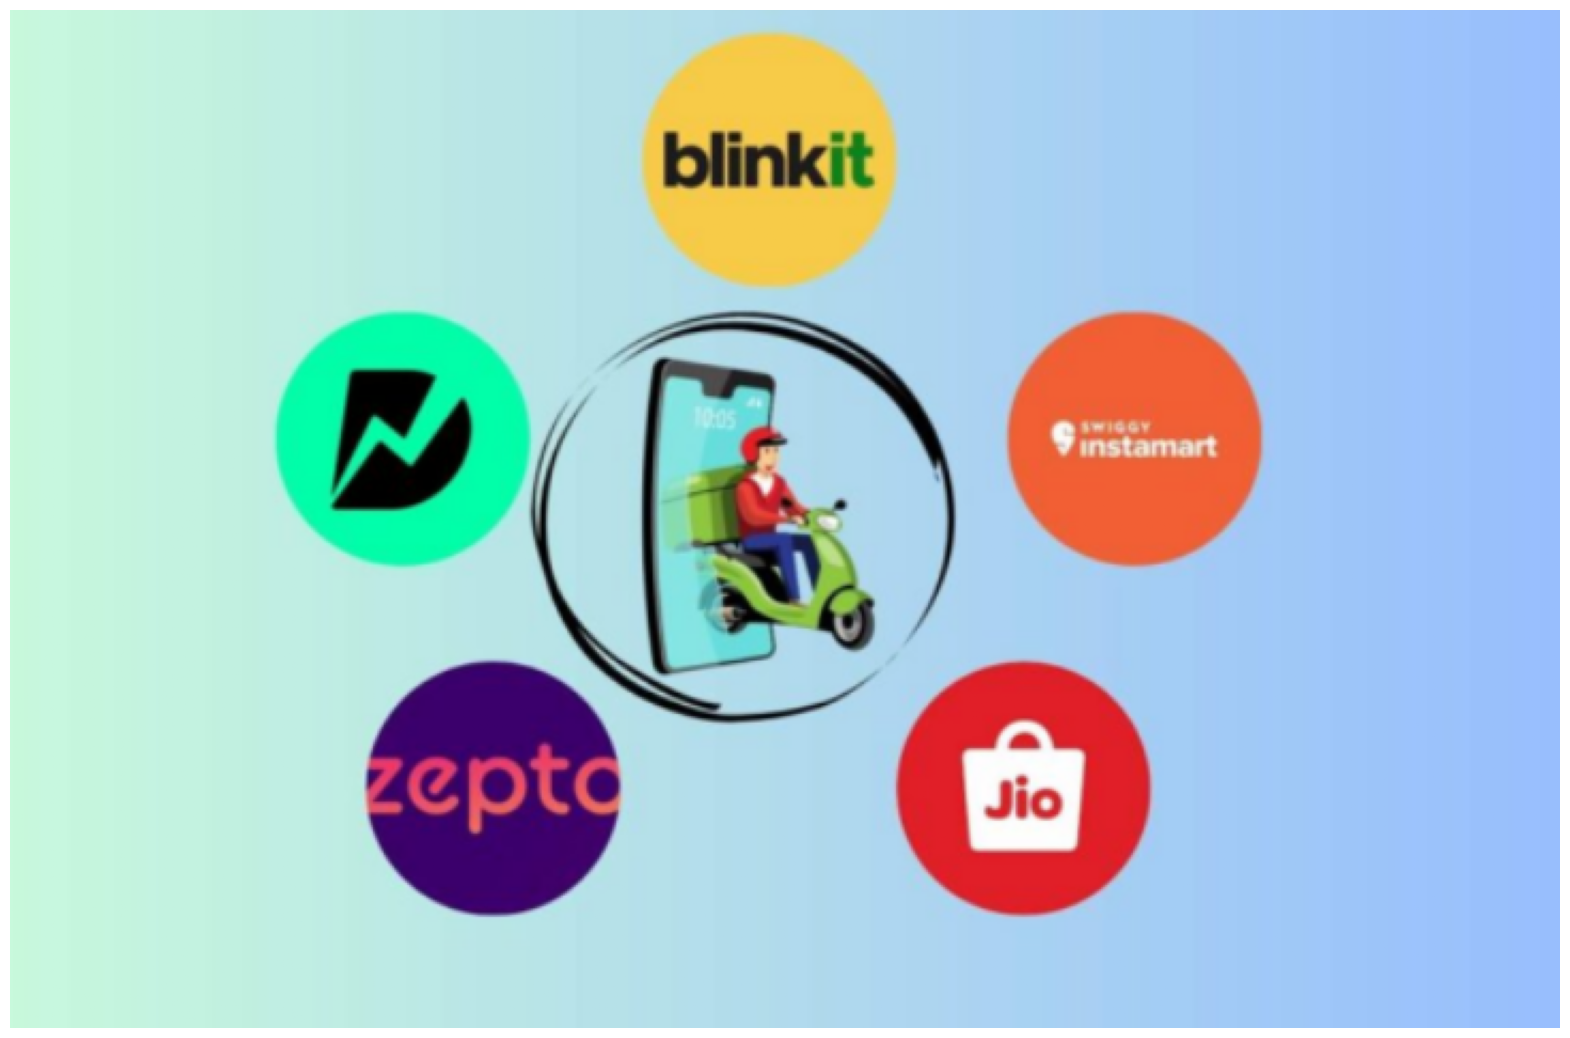

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Image path
image_path = r"/content/Screenshot 2025-04-26 172639.png"

# Load image
img = mpimg.imread(image_path)

# Set large figure size for full-width display
plt.figure(figsize=(20,20))  # Width=20 inches, Height=10 inches
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings  import filterwarnings
filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Ecommerce_Delivery_Analytics_New.csv')
df.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [ ]:
df.shape

(100000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


In [ ]:
# Check unique values to understand the format
df['Order Date & Time' ].unique()[:10]  # display first 10 unique values


array(['19:29.5', '54:29.5', '21:29.5', '49:29.5', '36:29.5', '22:29.5',
       '50:29.5', '51:29.5', '08:29.5', '32:29.5'], dtype=object)

In [ ]:
# Convert to datetime (coerce errors to NaT)
df['Order Date & Time'] = pd.to_datetime(df['Order Date & Time'], errors='coerce')

# Fill missing/NaT values (choose one method below)
# Method 1: Forward fill
# df['Order Date & Time'] = df['Order Date & Time'].ffill()

# Method 2: Fill with mean datetime
mean_time = df['Order Date & Time'].mean()
df['Order Date & Time'] = df['Order Date & Time'].fillna(mean_time)

# Method 3: Fill with random datetime within range
valid_times = df['Order Date & Time'].dropna()
if not valid_times.empty:
    start = valid_times.min()
    end = valid_times.max()
    random_times = pd.to_datetime(np.random.randint(start.value, end.value, size=df['Order Date & Time'].isna().sum()), unit='ns')
    df.loc[df['Order Date & Time'].isna(), 'Order Date & Time'] = random_times

# method()
# Truncate nanoseconds to seconds
df['Order Date & Time'] = df['Order Date & Time'].dt.floor('S')

# Optional: Format as string (YYYY-MM-DD HH:MM:SS)
df['Order Date & Time'] = df['Order Date & Time'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,2025-04-30 19:29:30,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,2025-04-30 11:59:33,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,2025-04-30 21:29:30,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,2025-04-30 19:29:30,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,2025-04-30 11:59:33,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [ ]:
(df['Customer Feedback'].value_counts()/100000)*100

,count
Customer Feedback,
"Easy to order, loved it!",7.791
Good quality products.,7.789
Excellent experience!,7.784
Very satisfied with the service.,7.740
Wrong item delivered.,7.738
Items missing from order.,7.737
"Fast delivery, great service!",7.715
Packaging could be better.,7.704
Quick and reliable!,7.658


In [ ]:
df.duplicated().any()

np.False_

# Observation:
# The dataset has a total of 11 columns(3 Numerical, 8 Categorical)

In [ ]:
# Find numerical columns (int, float)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols

['Delivery Time (Minutes)', 'Order Value (INR)', 'Service Rating']

In [ ]:
# Find categorical columns (object, category, bool)
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
categorical_cols

['Order ID',
 'Customer ID',
 'Platform',
 'Order Date & Time',
 'Product Category',
 'Customer Feedback',
 'Delivery Delay',
 'Refund Requested']

# Univariate Numerical Columns

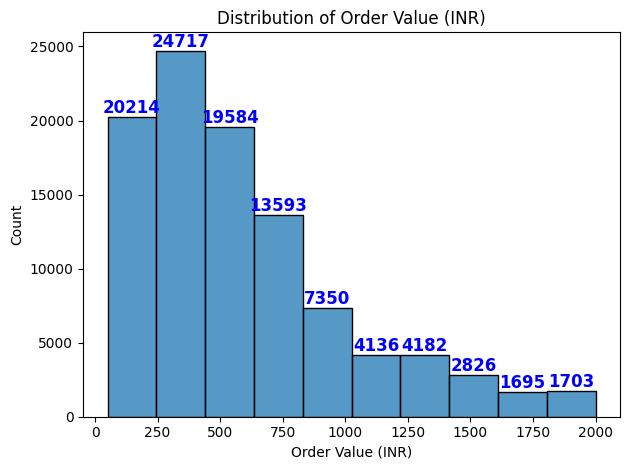

In [ ]:
E1= sns.histplot(df['Order Value (INR)'],bins=10)  # Numerical columns
for p in E1.patches:
    height = p.get_height()
    E1.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', color='b')
plt.title('Distribution of Order Value (INR)')
plt.tight_layout()
plt.show()

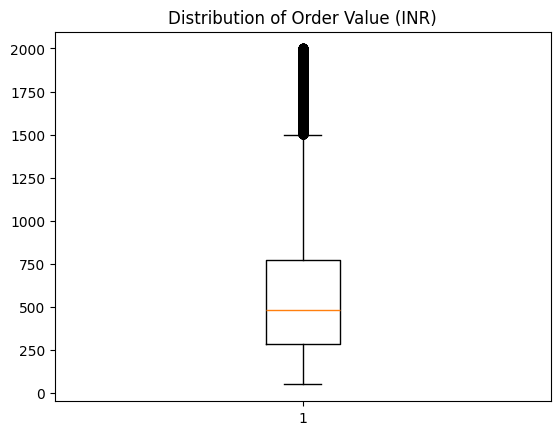

In [ ]:
plt.boxplot(df['Order Value (INR)'])   # Numerical columns
plt.title('Distribution of Order Value (INR)')
plt.show()

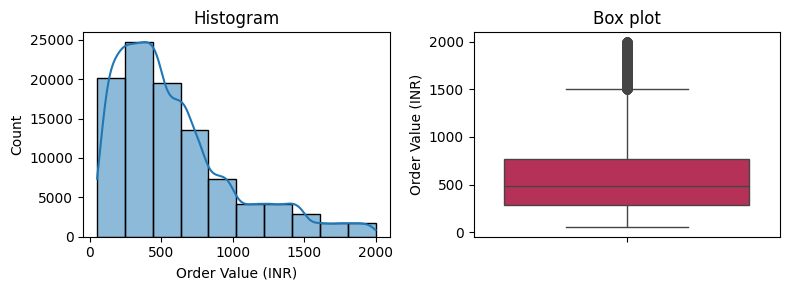

In [ ]:
def num_uni(column):
    c=sns.color_palette('rocket', as_cmap= True)
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1) # first plot (top-left)
    sns.histplot(column, bins=10,kde=True, palette='rocket')
    plt.title('Histogram')

    plt.subplot(1,2,2) # Third plot (bottom-left)
    sns.boxplot(column, palette='rocket')
    plt.title('Box plot')

    plt.tight_layout()
    plt.show()

num_uni(df['Order Value (INR)'])

In [ ]:
# Univariate Categorical Columns

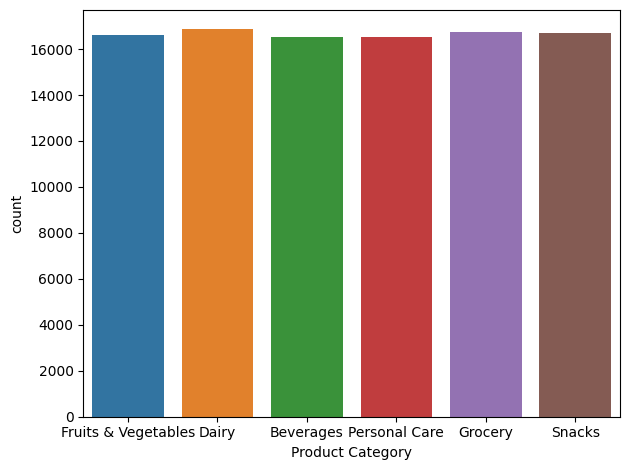

6
Product Category
Dairy                  16857
Grocery                16737
Snacks                 16705
Fruits & Vegetables    16632
Beverages              16536
Personal Care          16533
Name: count, dtype: int64


,count
Product Category,
Dairy,16.857
Grocery,16.737
Snacks,16.705
Fruits & Vegetables,16.632
Beverages,16.536
Personal Care,16.533


In [ ]:
sns.countplot(data=df,x='Product Category',orient='y/x',palette='tab10')
plt.tight_layout()
plt.show()
print(df['Product Category'].nunique())
print(df['Product Category'].value_counts())
(df['Product Category'].value_counts()/100000)*100  # Catergorical columns

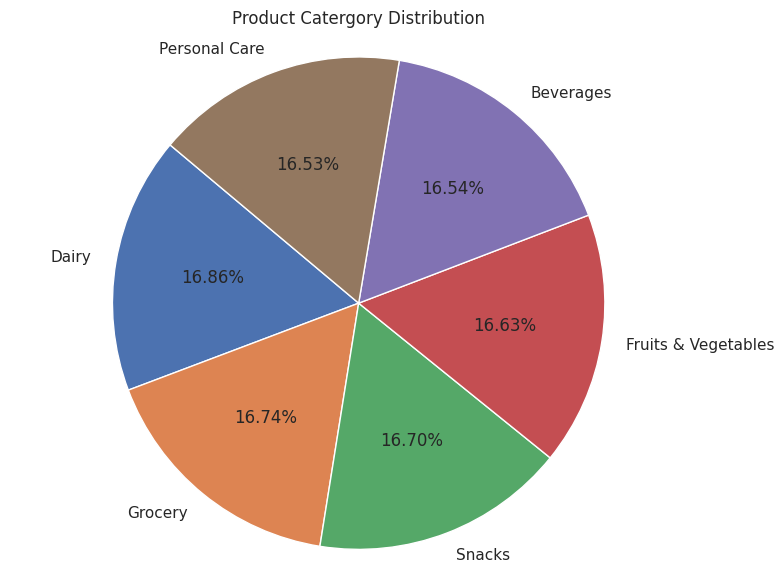

In [ ]:
# Pie chart
sns.set(style='darkgrid')
catergory_counts=df['Product Category'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(catergory_counts,
        labels=catergory_counts.index,
        autopct='%0.2f%%',
        startangle=140)
plt.title('Product Catergory Distribution')
plt.axis('equal')  # Keeps pie chart as a circle
plt.tight_layout()
plt.show() # Catergorical columns

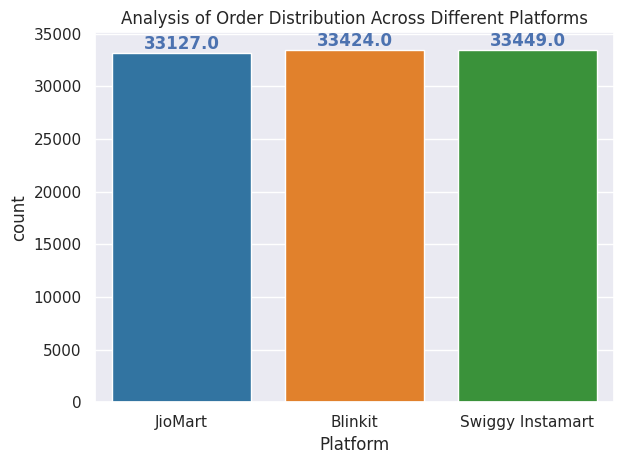

3
Platform
Swiggy Instamart    33449
Blinkit             33424
JioMart             33127
Name: count, dtype: int64


,count
Platform,
Swiggy Instamart,33.449
Blinkit,33.424
JioMart,33.127


In [ ]:
E4=sns.countplot(data=df,x='Platform',orient='y/x',palette='tab10')
for p in E4.patches:
    height = p.get_height()
    E4.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', color='b')

plt.title('Analysis of Order Distribution Across Different Platforms')
plt.tight_layout()
plt.show()
print(df['Platform'].nunique())
print(df['Platform'].value_counts())
(df['Platform'].value_counts()/100000)*100

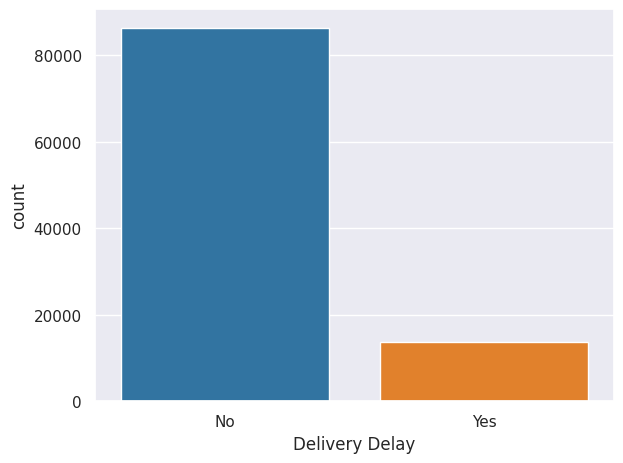

2
Delivery Delay
No     86328
Yes    13672
Name: count, dtype: int64


,count
Delivery Delay,
No,86.328
Yes,13.672


In [ ]:
sns.countplot(data=df,x='Delivery Delay',orient='y/x',palette='tab10')
plt.tight_layout()
plt.show()
print(df['Delivery Delay'].nunique())
print(df['Delivery Delay'].value_counts())
(df['Delivery Delay'].value_counts()/100000)*100

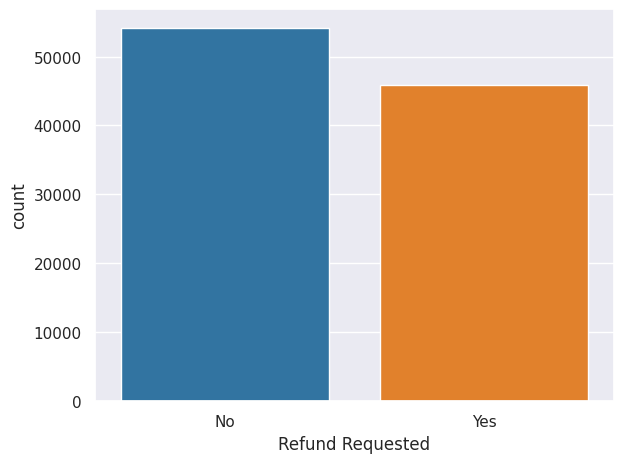

2
Refund Requested
No     54181
Yes    45819
Name: count, dtype: int64


,count
Refund Requested,
No,54.181
Yes,45.819


In [ ]:
sns.countplot(data=df,x='Refund Requested',orient='y/x',palette='tab10')
plt.tight_layout()
plt.show()

print(df['Refund Requested'].nunique())
print(df['Refund Requested'].value_counts())
(df['Refund Requested'].value_counts()/100000)*100

In [ ]:
# Bi-Variate Analysis:

In [ ]:
df.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,2025-04-30 19:29:30,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,2025-04-30 11:59:33,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,2025-04-30 21:29:30,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,2025-04-30 19:29:30,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,2025-04-30 11:59:33,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [ ]:
# Numerical vs Numerical Columns:

In [ ]:
# Numerical vs Catergorical Columns:

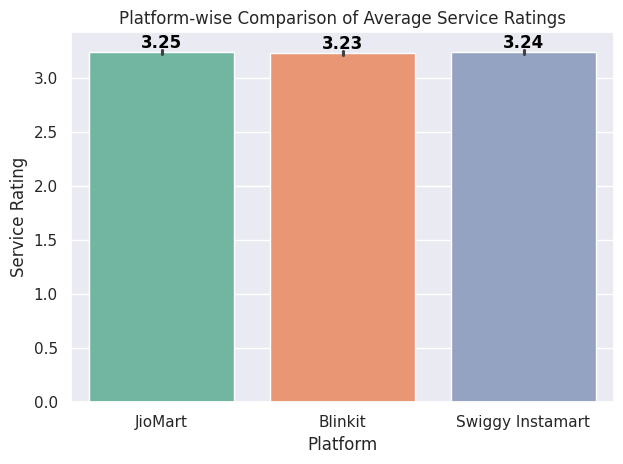

In [ ]:
# Bar plot: Mean order value for each product category
E3=sns.barplot(data=df,
            x='Platform',
            y='Service Rating',
            estimator='mean',   # default is mean
            palette='Set2')
for p in E3.patches:
    height = p.get_height()
    E3.annotate(f'{height:.2f}',  # rounds to 2 decimal places
                (p.get_x() + p.get_width() / 2., height),  # on top of the bar
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', color='black')

plt.title('Platform-wise Comparison of Average Service Ratings')
plt.tight_layout()
plt.show()

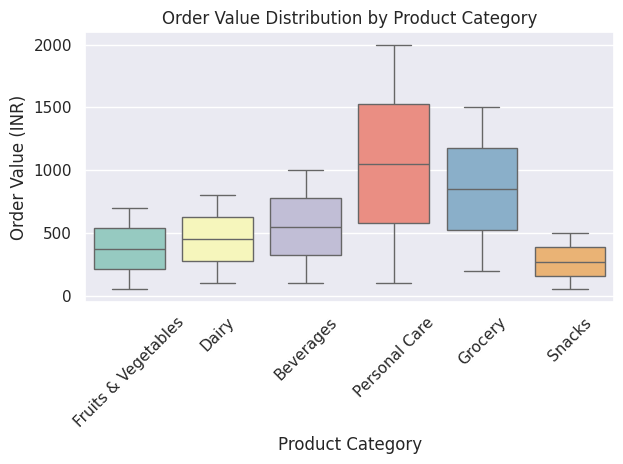

In [ ]:
sns.boxplot(data=df,
            x='Product Category',
            y='Order Value (INR)',
            palette='Set3')
plt.xticks(rotation=45)
plt.title('Order Value Distribution by Product Category')
plt.tight_layout()
plt.show()

In [ ]:
# Catergorical vs Catergorical Columns:

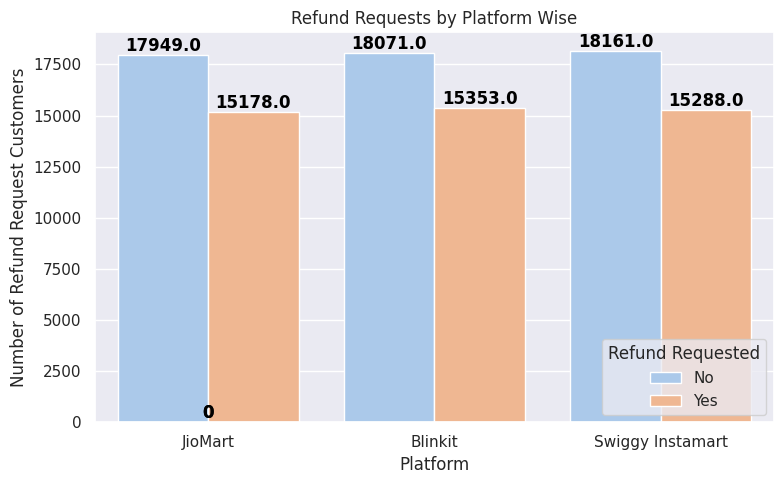

In [ ]:
# Countplot: Categorical vs Categorical
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df,
              x='Platform',
              hue='Refund Requested',   # second category
              palette='pastel')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),  # on top of the bar
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', color='black')

plt.title('Refund Requests by Platform Wise')
plt.ylabel('Number of Refund Request Customers')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()

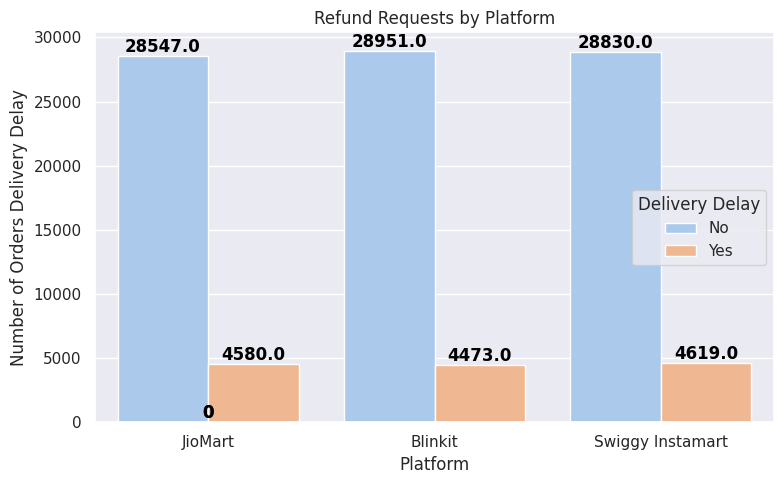

In [ ]:
# Countplot: Categorical vs Categorical
plt.figure(figsize=(8,5))
E2=sns.countplot(data=df,
              x='Platform',
              hue='Delivery Delay',   # second category
              palette='pastel')
for p in E2.patches:
    height = p.get_height()
    E2.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),  # on top of the bar
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', color='black')

plt.title('Refund Requests by Platform')
plt.ylabel('Number of Orders Delivery Delay')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()

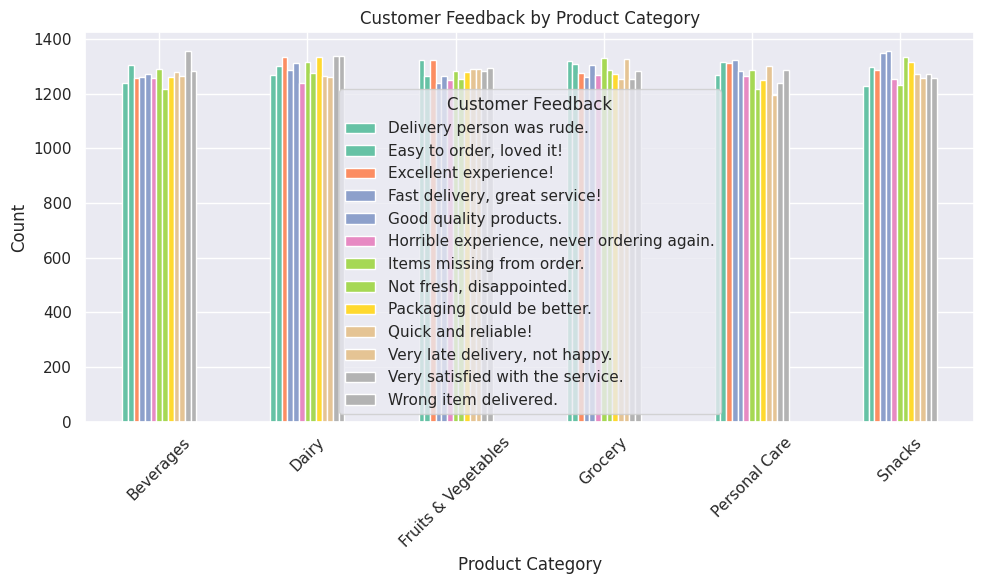

In [ ]:
# Create a cross-tabulation (count of occurrences)
ct = pd.crosstab(df['Product Category'], df['Customer Feedback'])

# Plot
ct.plot(kind='bar', figsize=(10,6), colormap='Set2')

plt.title('Customer Feedback by Product Category')
plt.ylabel('Count')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
# Multi-Variate Analysis:

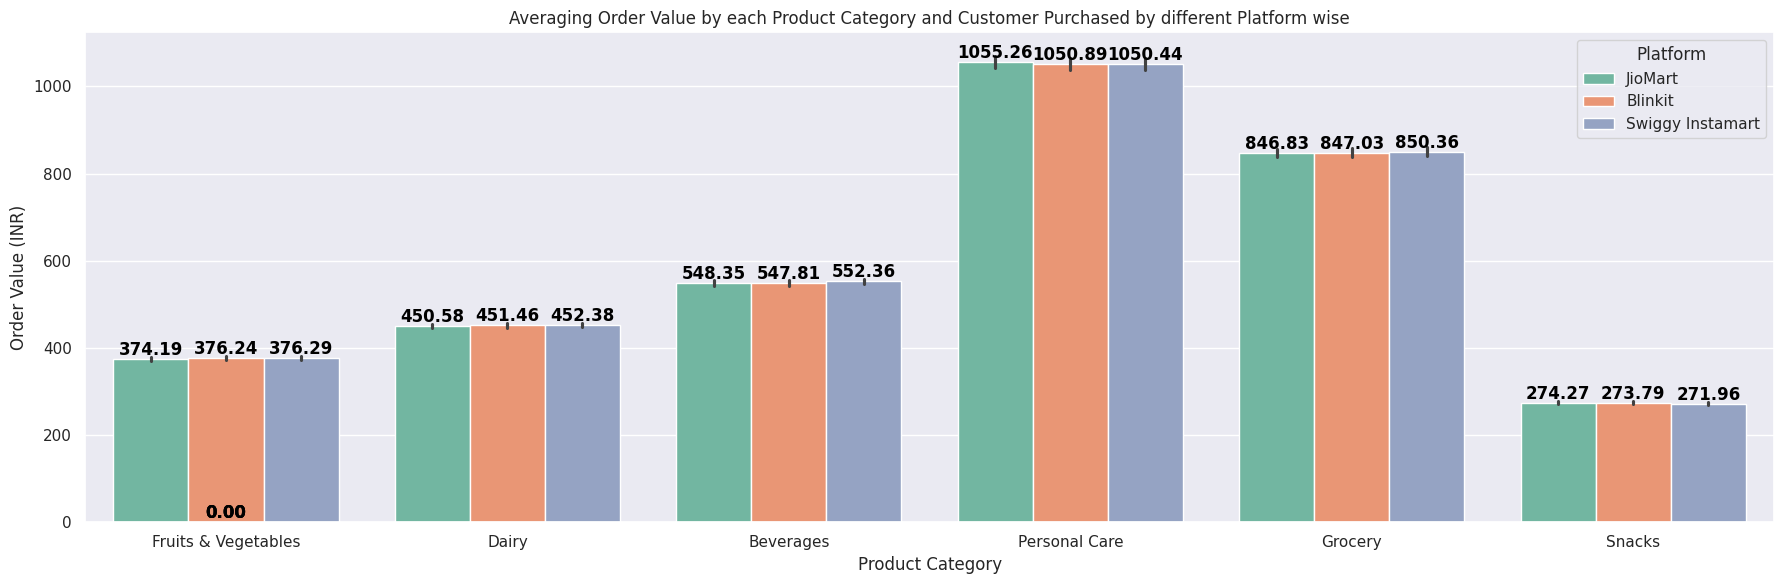

In [ ]:
# Barplot: Avg Order Value per Product Category & Platform
plt.figure(figsize=(18,6))
E3=sns.barplot(data=df,x='Product Category',y='Order Value (INR)',hue='Platform', estimator='mean',palette='Set2')  # Third variable
for p in E3.patches:
    height = p.get_height()
    E3.annotate(f'{height:.2f}',  # rounds to 2 decimal places
                (p.get_x() + p.get_width() / 2., height),  # on top of the bar
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', color='black')
plt.title('Averaging Order Value by each Product Category and Customer Purchased by different Platform wise')
plt.tight_layout()
plt.show()

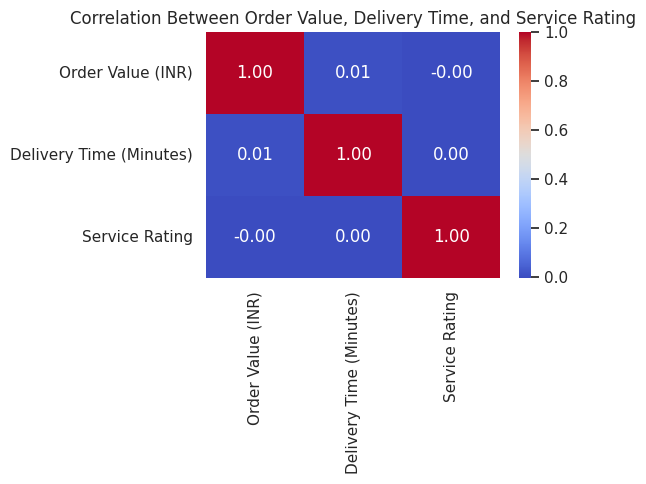

In [ ]:
# Select only numeric columns
numeric_cols = df[['Order Value (INR)', 'Delivery Time (Minutes)', 'Service Rating']]
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f")

plt.title('Correlation Between Order Value, Delivery Time, and Service Rating')
plt.tight_layout()
plt.show()

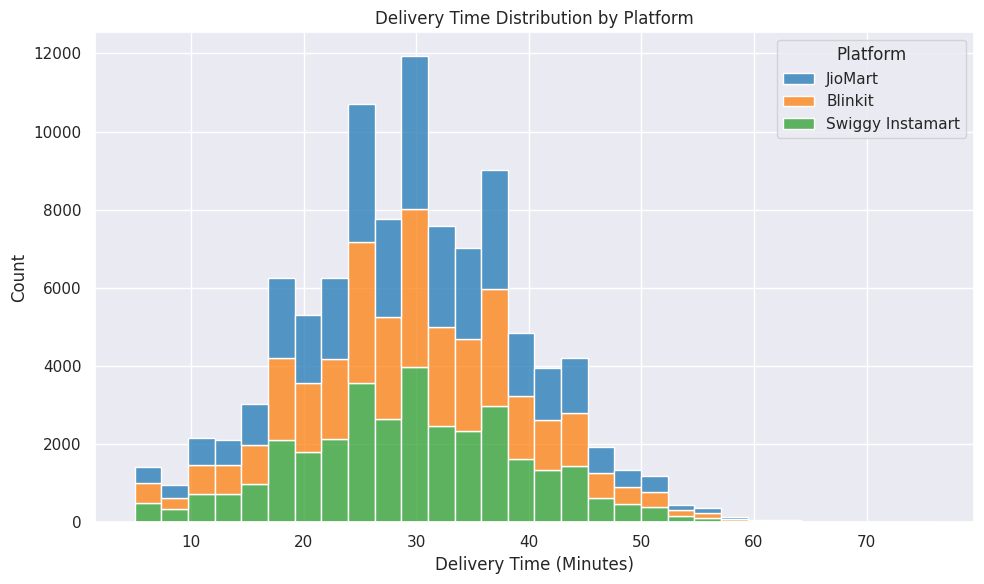

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df,
             x='Delivery Time (Minutes)',
             hue='Platform',
             multiple='stack',        # 'dodge' for side-by-side bars
             bins=30,
             palette='tab10')
plt.title('Delivery Time Distribution by Platform')
plt.tight_layout()
plt.show()

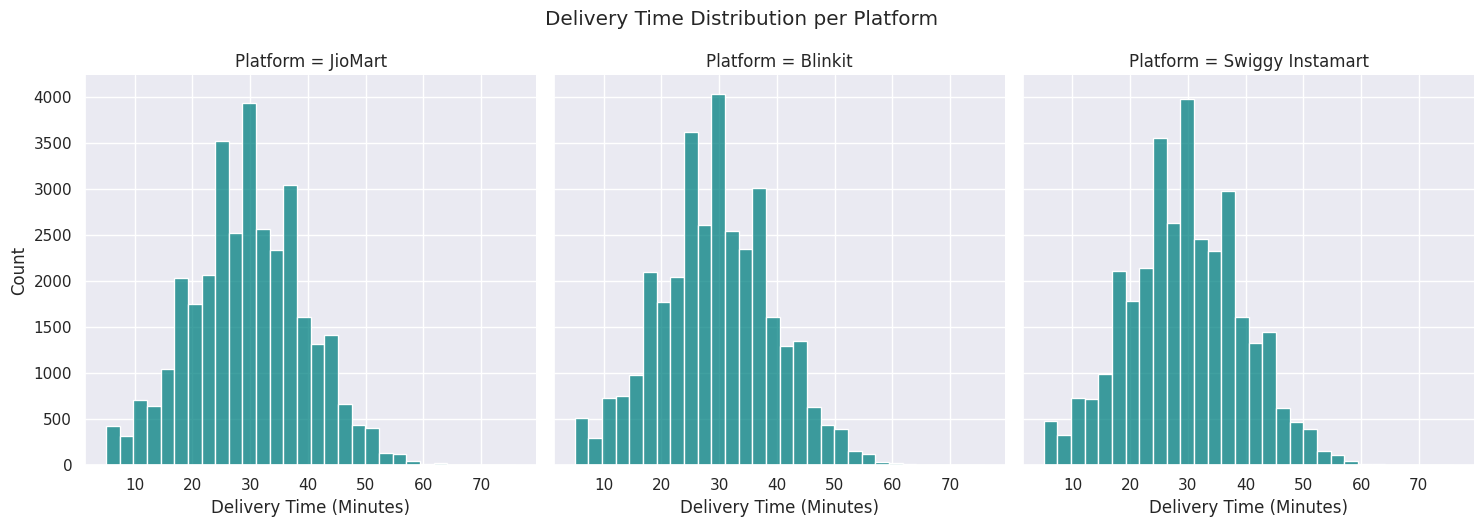

In [ ]:
sns.displot(data=df,
            x='Delivery Time (Minutes)',
            col='Platform',
            bins=30,
            color='teal')

plt.suptitle('Delivery Time Distribution per Platform', y=1.05)
plt.show()

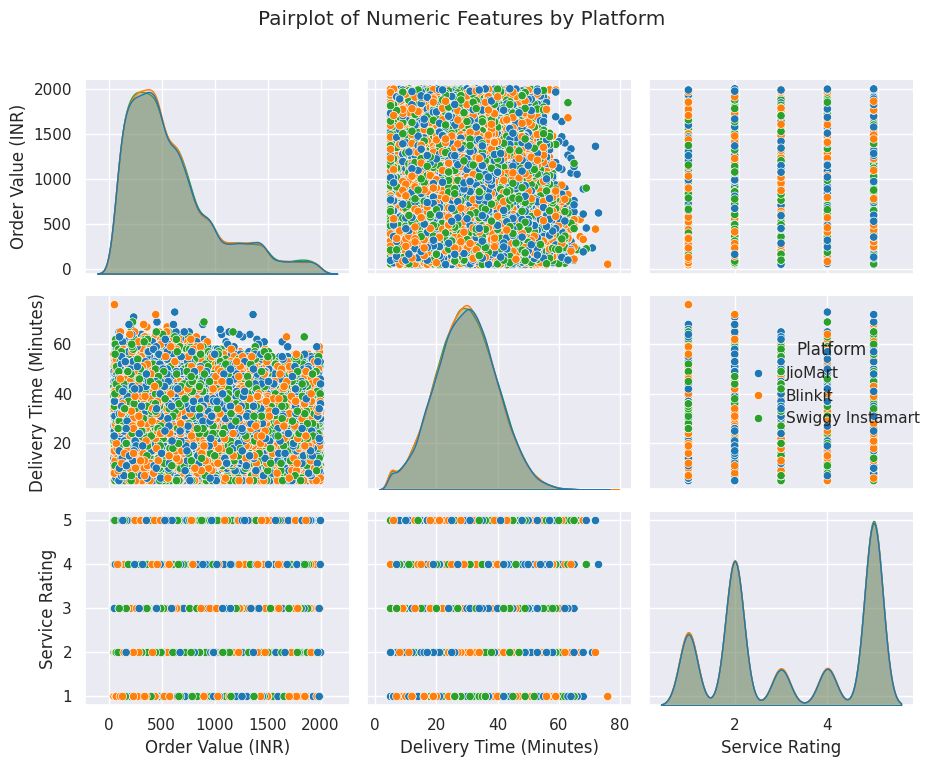

In [ ]:
sns.pairplot(df,
             vars=['Order Value (INR)', 'Delivery Time (Minutes)', 'Service Rating'],
             hue='Platform',              # Color by categorical
             palette='tab10')

plt.suptitle('Pairplot of Numeric Features by Platform', y=1.02)
plt.tight_layout()
plt.show()

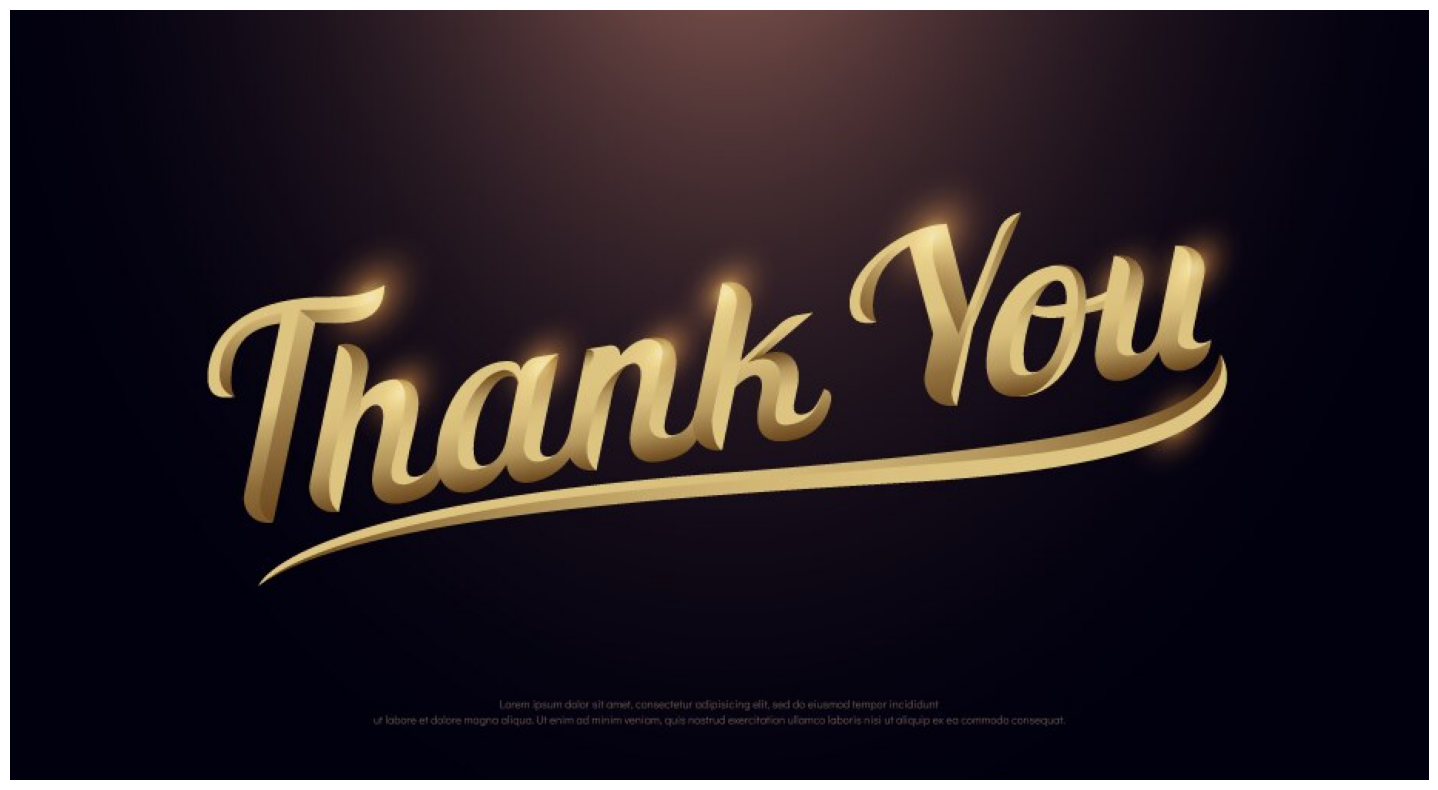

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Image path
image_path = r"/content/thank-you eda project.jpg"

# Load image
img = mpimg.imread(image_path)

# Set large figure size for full-width display
plt.figure(figsize=(20, 10))  # Width=20 inches, Height=10 inches
plt.imshow(img)
plt.axis('off')
plt.show()